- Name: `Samip Regmi`
- Group: `L5CG4`
- University ID: `2511198`
- Idenfication Number: `np02cs4a240105`
- Submitted To: `Ayush Regmi Sir`

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("C:\\Users\\NITRO\\Desktop\\codes\\college\\ai\\main_coursework_1\\Human_Development_Index_Dataset.csv",encoding='latin1')

# Problem 1

## 3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

### 1. Extract Latest Year:

- [x] Identify unique years in the dataset.

In [83]:
unique_years = df["year"].unique()
unique_years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

- [x] Filter dataset to only include data from 2022

In [84]:
only_2022 = df["year"] == 2022
df_2022 = df[only_2022].copy()

- [x] Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

In [85]:
df_2022.to_csv("hdi_2022_df.csv")

### Data Exploration

- [x] Display the first 10 rows of the 2022 dataset

In [86]:
df_2022.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


- [x] Count the number of rows and columns

In [87]:
rows, columns = df_2022.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 206
Number of columns: 30


- [x] List all column names and their data types.

In [88]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

### Missing Values & Data Cleaning:

- [x] Check for missing values in each column and report total counts.

In [89]:
df_2022.isnull().sum()

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

#### Inspect dataset for

- [x] numeric columns stored as text

In [90]:
df_2022.dtypes
# we can see, all the data in numeric columns are numerical values

Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_participation_f_%     float64
l

- [x] inconsistent or misspelled country names

In [91]:
df['country'].str.strip().value_counts()

country
Afghanistan                        33
Albania                            33
Algeria                            33
Andorra                            33
Angola                             33
                                   ..
Europe and Central Asia            33
Latin America and the Caribbean    33
South Asia                         33
Sub-Saharan Africa                 33
World                              33
Name: count, Length: 206, dtype: int64

- [x] Checking duplicate rows

In [92]:
df_2022.duplicated().sum()

np.int64(0)

- [x] special characters (e.g., “–”) representing missing data

In [93]:
special_symbols = ["-"]
df_2022.isin(special_symbols).sum()
df_2022 = df_2022.replace(special_symbols, pd.NA)


#### Applying necessary cleaning steps

- [x] converting datatype where needed

In [94]:
numerical_columns = [
    "year",
    "hdi",
    "life_expectancy",
    "pop_millions",
    "hdi_f",
    "hdi_m",
    "life_expec_f",
    "life_expec_m",
    "expec_yr_school",
    "expec_yr_school_f",
    "expec_yr_school_m",
    "mean_yr_school",
    "mean_yr_school_f",
    "mean_yr_school_m",
    "gross_inc_percap",
    "gross_inc_percap_f",
    "gross_inc_percap_m",
    "gender_development",
    "gender_inequality",
    "secondary_education_f_%",
    "secondary_education_m_%",
    "seats_in_parliament_f_%",
    "seats_in_parliament_m_%",
    "labour_participation_f_%",
    "labour_participation_m_%",
    "co2_emission_tons",
    "mat_footprint_percap_tons"
]


cols_to_convert = df_2022.columns.intersection(numerical_columns)
df_2022[cols_to_convert] = df_2022[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [95]:
df_2022.dtypes

Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_participation_f_%     float64
l

- [x] Remove duplicates

In [96]:
df_2022.drop_duplicates(inplace=True)

- [x] handle missing values (drop or impute; justify your choice)

Missing data were handled based on the proportion of missingness. For columns with 10% or less missing values, rows containing missing observations were removed to maintain accuracy. For columns with more than 10% missing values, missing entries were imputed using the column mean to preserve the data distribution

In [97]:
null_percentage = df_2022.isnull().sum() / df_2022.shape[0] * 100
null_columns_fill = null_percentage[null_percentage > 10].index

# FILL IF MORE THAN 10%
df_2022.fillna(df_2022[null_columns_fill].mean(), inplace=True)

# DROP IF LESS THAN 10
null_columns_drop = null_percentage[null_percentage <= 10].index
df_2022.dropna(subset=null_columns_drop, inplace=True)

print("\nMissing values after processing:\n", df_2022.isnull().sum())


Missing values after processing:
 Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


### Basic Statistics:

- [x] Compute the mean, median, and standard deviation of HDI for the year 2022

In [98]:
df_2022_mean = df_2022["hdi"].mean()
df_2022_median = df_2022["hdi"].median()
df_2022_standard_deviation = df_2022["hdi"].std()

print(f"Mean HDI for 2022: {df_2022_mean}")
print(f"Median HDI for 2022: {df_2022_median}")
print(f"Standard Deviation of HDI for 2022: {df_2022_standard_deviation}")

Mean HDI for 2022: 0.7268333333333336
Median HDI for 2022: 0.7415
Standard Deviation of HDI for 2022: 0.15219828657299064


- [x] Identify the country with the highest HDI in 2022.

In [99]:
country_index_highest_hdi = df_2022["hdi"].idxmax()
country_highest_hdi = df_2022.loc[country_index_highest_hdi, "country"]
print(f"Country with highest HDI is {country_highest_hdi} with HDI {df_2022.loc[country_index_highest_hdi, "hdi"]}")

Country with highest HDI is Switzerland with HDI 0.967


- [x] Identify the country with the lowest HDI in 2022.

In [100]:
country_index_lowest_hdi = df_2022["hdi"].idxmin()
country_lowest_hdi = df_2022.loc[country_index_lowest_hdi, "country"]
print(f"Country with lowest HDI is {country_lowest_hdi} with HDI {df_2022.loc[country_index_lowest_hdi, "hdi"]}")

Country with lowest HDI is Somalia with HDI 0.38


### Filtering and Sorting:

- [x]  Filter countries with HDI {"hdi"} greater than 0.800

In [101]:
countries_hdi_greater_eight = df_2022[(df_2022["hdi"] > 0.8)]
countries_hdi_greater_eight[["hdi","country","year"]]

,hdi,country,year
230,0.849,Argentina,2022
296,0.946,Australia,2022
329,0.926,Austria,2022
395,0.820,Bahamas,2022
428,0.888,Bahrain,2022
...,...,...,...
6137,0.940,United Kingdom,2022
6170,0.927,United States,2022
6203,0.830,Uruguay,2022
6467,0.902,Very high human development,2022


- [x] Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.

In [102]:
countries_by_gni_desc = countries_hdi_greater_eight.sort_values(by="gross_inc_percap", ascending=False)
countries_by_gni_desc[["hdi","country","year","gross_inc_percap"]].head(10)

,hdi,country,year,gross_inc_percap
4718,0.875,Qatar,2022,95944.37754
5213,0.949,Singapore,2022,88761.14559
2705,0.950,Ireland,2022,87467.51391
3398,0.927,Luxembourg,2022,78554.23640
6104,0.937,United Arab Emirates,2022,74103.71494
5609,0.967,Switzerland,2022,69432.78669
4322,0.966,Norway,2022,69189.76165
6170,0.927,United States,2022,65564.93798
1550,0.952,Denmark,2022,62018.95694
824,0.823,Brunei Darussalam,2022,59245.63485


- [x] Display the top 10 countries

In [103]:
countries_by_gni_desc.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
1550,1551,DNK,Denmark,2022,0.952,81.882,5.882262,0.941874,0.959920,83.802,...,0.981,0.009,95.067261,95.238098,43.575419,56.424581,59.42,67.42,5.057582,24.2328
824,825,BRN,Brunei Darussalam,2022,0.823,74.551,0.449001,0.814382,0.828827,76.791,...,0.983,0.279,70.900000,71.500000,9.090909,90.909091,54.89,71.65,25.376258,37.8287


### Adding HDI Category Column

- [x] Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP)

In [104]:
def hdi_category(data):
  if data < 0.550:
    return "Low"
  elif data >= 0.550 and data <= 0.699:
    return "Medium"
  elif data >= 0.700 and data <= 0.799:
    return "High"
  else:
    return "Very"


In [105]:
df_2022["HDI Category"] = df_2022["hdi"].apply(hdi_category)

In [106]:
df_2022["HDI Category"].value_counts()

HDI Category
Very      64
High      49
Medium    36
Low       31
Name: count, dtype: int64

- [x] saving the final dataframe with hdi category

In [107]:
df_2022.to_csv("HDI_category_added.csv")

## 3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)


#### Data Extraction and Saving

- [x] Filter the dataset to include only the years 2020, 2021 and 2022.

In [108]:
df_filtered = df[df['year'].isin([2020, 2021, 2022])].copy()

- [x] Save the filtered dataset as HDI problem1B.csv.

In [109]:
df_filtered.to_csv("HDI_problem1B.csv")

#### Data Cleaning

##### Check for missing values in the following essential columns:

- hdi
- country
- year

In [110]:
null_count_hdi = df_filtered["hdi"].isnull().sum()
null_count_country = df_filtered["country"].isnull().sum()
null_count_year = df_filtered["year"].isnull().sum()

print(f"Number of null values in 'hdi': {null_count_hdi}")
print(f"Number of null values in 'country': {null_count_country}")
print(f"Number of null values in 'year': {null_count_year}")

Number of null values in 'hdi': 8
Number of null values in 'country': 0
Number of null values in 'year': 0


###### Identify and address the following issues:

- missing or null values,

In [111]:
null_percentage = df_filtered.isnull().sum() / df_filtered.shape[0] * 100
null_columns_fill = null_percentage[null_percentage > 10].index

# FILL IF MORE THAN 10%
df_filtered.fillna(df_filtered[null_columns_fill].mean(), inplace=True)

# DROP IF LESS THAN 10
null_columns_drop = null_percentage[null_percentage <= 10].index
df_filtered.dropna(subset=null_columns_drop, inplace=True)

print("\nMissing values after processing:\n", df_filtered.isnull().sum())


Missing values after processing:
 Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


- inconsistent or misspelled country names,
- duplicate rows,
- numeric columns stored as text or containing non-numeric symbols

In [112]:
df_filtered.dtypes
df_filtered.drop_duplicates()
df_filtered.isin(special_symbols).sum()

Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64

#### Visualization Tasks

##### A. Line Chart - HDI Trend (Country-Level)

- [x] Select any five countries (or five countries from a region of your choice).

In [113]:
selected_countries = ["Nepal", "India", "Bangladesh", "Bhutan", "Pakistan"]
selected_countries_df = df_filtered[(df_filtered["country"].isin(selected_countries))].copy()


# seperating in terms of year
selected_countries_df_2020 = selected_countries_df[selected_countries_df["year"] == 2020]
selected_countries_df_2021 = selected_countries_df[selected_countries_df["year"] == 2021]
selected_countries_df_2022 = selected_countries_df[selected_countries_df["year"] == 2022]

- [x]  Plot HDI values for each country across the years 2020, 2021, and 2022

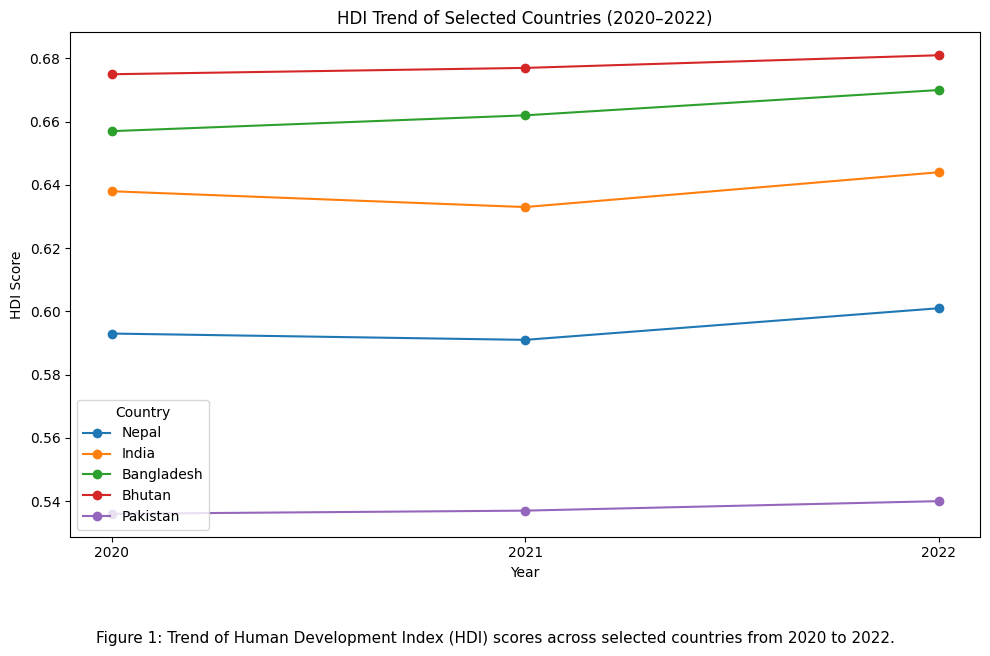

In [114]:
plt.figure(figsize=(10, 6))

# Nepal
nepal = selected_countries_df[selected_countries_df["country"] == "Nepal"]
plt.plot(nepal["year"], nepal["hdi"], marker="o", label="Nepal")

# India
india = selected_countries_df[selected_countries_df["country"] == "India"]
plt.plot(india["year"], india["hdi"], marker="o", label="India")

# Bangladesh
bangladesh = selected_countries_df[selected_countries_df["country"] == "Bangladesh"]
plt.plot(bangladesh["year"], bangladesh["hdi"], marker="o", label="Bangladesh")

# Bhutan
bhutan = selected_countries_df[selected_countries_df["country"] == "Bhutan"]
plt.plot(bhutan["year"], bhutan["hdi"], marker="o", label="Bhutan")

# Pakistan
pakistan = selected_countries_df[selected_countries_df["country"] == "Pakistan"]
plt.plot(pakistan["year"], pakistan["hdi"], marker="o", label="Pakistan")

plt.title("HDI Trend of Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI Score")
plt.xticks([2020, 2021, 2022])
plt.legend(title="Country")

plt.figtext(
    0.5, -0.08,
    "Figure 1: Trend of Human Development Index (HDI) scores across selected countries from 2020 to 2022.",
    ha="center",
    fontsize=11
)

plt.tight_layout()
plt.show()

Interpretation of Figure 1:
- The figure illustrates a consistent regional trend across all three years, where Bhutan maintains the highest Human Development Index (HDI) score and Pakistan consistently records the lowest.

Insight for Figure 1:
- Figure 1 shows a persistent gap in HDI among the selected countries, with Bhutan consistently having the highest HDI and Pakistan the lowest. Although HDI improves slightly for all countries over time, the relative disparity between them remains largely unchanged.



##### B. Generate Visualizations

###### Bar Chart: Average HDI by Region

- [x] Group the dataset by Region and Year.

In [115]:
regions = [
    'East Asia and the Pacific', 'Europe and Central Asia',
    'Latin America and the Caribbean', 'South Asia',
    'Sub-Saharan Africa']

region_df = df[df['country'].isin(regions)].copy()

region_df = region_df[region_df['year'].isin([2020, 2021, 2022])]
region_df['region'] = region_df['country']

avg_hdi = region_df.groupby(['region', 'year'])['hdi'].mean().reset_index()
avg_hdi

,region,year,hdi
0,East Asia and the Pacific,2020,0.760
1,East Asia and the Pacific,2021,0.761
2,East Asia and the Pacific,2022,0.766
3,Europe and Central Asia,2020,0.792
4,Europe and Central Asia,2021,0.797
5,Europe and Central Asia,2022,0.802
6,Latin America and the Caribbean,2020,0.755
7,Latin America and the Caribbean,2021,0.754
8,Latin America and the Caribbean,2022,0.763
9,South Asia,2020,0.635


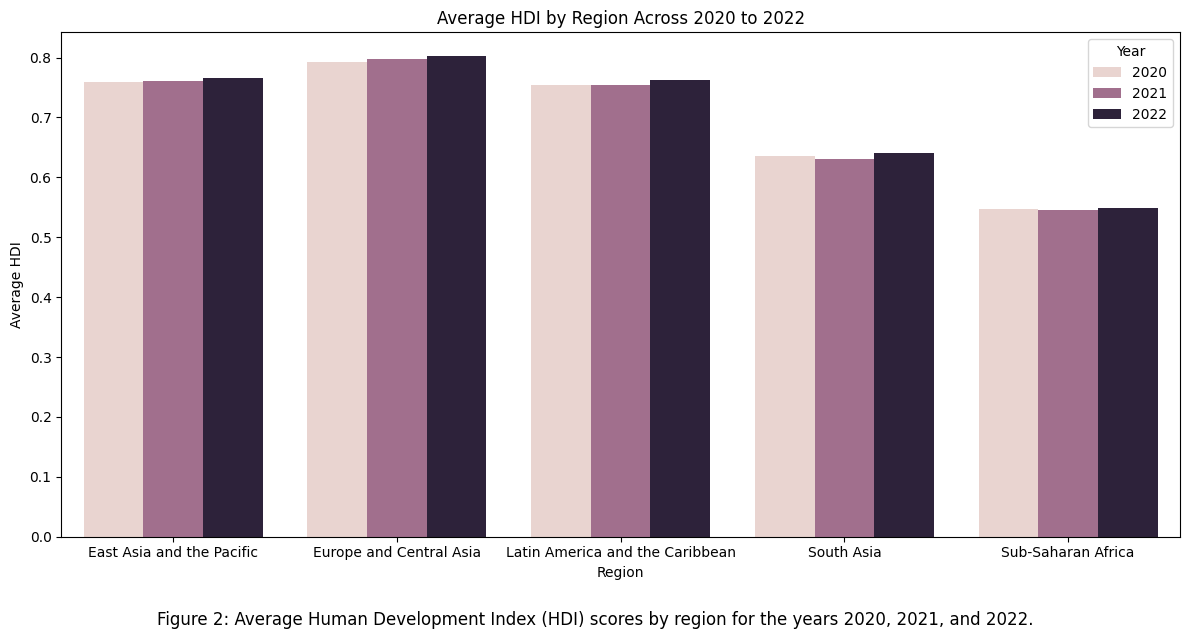

In [116]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_hdi,
    x='region',
    y='hdi',
    hue='year'

)

plt.title("Average HDI by Region Across 2020 to 2022")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.legend(title="Year")
plt.figtext(
    0.5, -0.05,
    "Figure 2: Average Human Development Index (HDI) scores by region for the years 2020, 2021, and 2022.",
    ha="center", fontsize=12
)

plt.tight_layout()
plt.show()

Interpretation of Figure 2:
- Europe and Central Asia consistently show the highest mean HDI values, whereas Sub-Saharan Africa records the lowest levels throughout all three years. The results point to a clear development gap, with Europe, East Asia, and Latin America all sustaining average HDI scores above 0.75, well ahead of South Asia and SubSaharan Africa.

Insight for Figure 2:
- Figure 2 highlights a persistent global development divide, with Europe and Central Asia maintaining the highest mean HDI and Sub-Saharan Africa remaining the lowest across all three years. Regions such as East Asia and Latin America consistently outperform South Asia, reinforcing long-standing regional inequalities in human development.


###### Box Plot: HDI Distribution for 2020, 2021 and 2022

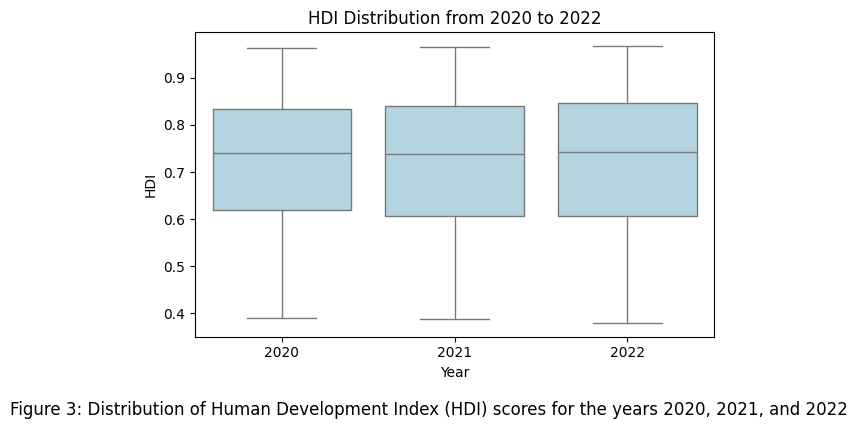

In [117]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_filtered,
    x='year',
    y='hdi',
    color='lightblue'
)

plt.title('HDI Distribution from 2020 to 2022')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.figtext(
    0.5, -0.05,
    "Figure 3: Distribution of Human Development Index (HDI) scores for the years 2020, 2021, and 2022",
    ha="center", fontsize=12
)
plt.tight_layout()
plt.show()

Interpretation of Figure 3
- The box plots reveal a remarkably stable distribution of HDI scores across 2020, 2021, and 2022, with the median remaining consistent around 0.74 and the interquartile ranges showing almost no variation.

Insights of Figure 3
- Figure 3 indicates that the global distribution of HDI remained largely stable from 2020 to 2022, with minimal changes in both the median and spread. This suggests that short-term global shocks did not significantly alter overall HDI inequality during this period.


###### Scatter Plot: HDI vs GNI per capita

- [x] Check if the dataset contains a column for GNI per Capita.

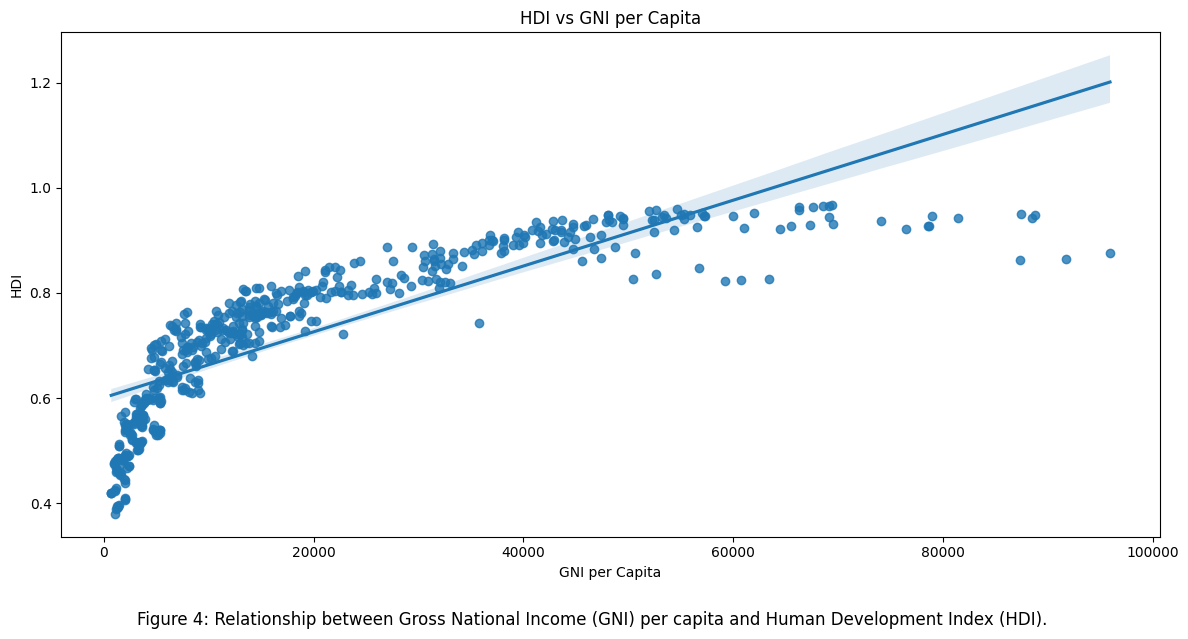

In [118]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df_filtered, x="gross_inc_percap", y="hdi")

plt.title("HDI vs GNI per Capita")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")

plt.figtext(
    0.5, -0.05,
    "Figure 4: Relationship between Gross National Income (GNI) per capita and Human Development Index (HDI). ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()


Interpretation of Figure 4
- The chart demonstrates a strong positive correlation between GNI per Capita and HDI, confirming that higher national income is closely linked to better human development outcomes. However, the relationship follows a logarithmic curve rather than a straight line, indicating that while wealth initially boosts HDI significantly it also relates to other factors.

Insight for Figure 4:
- Figure 4 shows a strong positive relationship between GNI per capita and HDI, where increases in income are associated with better human development outcomes. However, the logarithmic pattern suggests diminishing returns, meaning that beyond a certain income level, further economic growth contributes less significantly to HDI improvements.


In [119]:

nepal_improvement = (
    selected_countries_df_2022[selected_countries_df_2022["country"] == "Nepal"]["hdi"].values[0]
    - selected_countries_df_2020[selected_countries_df_2020["country"] == "Nepal"]["hdi"].values[0]
)
india_improvement = (
    selected_countries_df_2022[selected_countries_df_2022["country"] == "India"]["hdi"].values[0]
    - selected_countries_df_2020[selected_countries_df_2020["country"] == "India"]["hdi"].values[0]
)

bangladesh_improvement = (
    selected_countries_df_2022[selected_countries_df_2022["country"] == "Bangladesh"]["hdi"].values[0]
    - selected_countries_df_2020[selected_countries_df_2020["country"] == "Bangladesh"]["hdi"].values[0]
)

bhutan_improvement = (
    selected_countries_df_2022[selected_countries_df_2022["country"] == "Bhutan"]["hdi"].values[0]
    - selected_countries_df_2020[selected_countries_df_2020["country"] == "Bhutan"]["hdi"].values[0]
)

pakistan_improvement = (
    selected_countries_df_2022[selected_countries_df_2022["country"] == "Pakistan"]["hdi"].values[0]
    - selected_countries_df_2020[selected_countries_df_2020["country"] == "Pakistan"]["hdi"].values[0]
)
print(nepal_improvement)
print(india_improvement)
print(bangladesh_improvement)
print(bhutan_improvement)
print(pakistan_improvement)


0.008000000000000007
0.006000000000000005
0.013000000000000012
0.006000000000000005
0.0040000000000000036


In [120]:
region_3year_avg = (
    avg_hdi
    .groupby("region")["hdi"]
    .mean()
    .reset_index()
)

region_3year_avg
highest_region = region_3year_avg.loc[region_3year_avg["hdi"].idxmax()]
lowest_region = region_3year_avg.loc[region_3year_avg["hdi"].idxmin()]

print("Highest average HDI region:")
print(highest_region)

print("\nLowest average HDI region:")
print(lowest_region)


Highest average HDI region:
region    Europe and Central Asia
hdi                         0.797
Name: 1, dtype: object

Lowest average HDI region:
region    Sub-Saharan Africa
hdi                 0.547333
Name: 4, dtype: object


### Short Analysis Questions:

- [x]  Which countries show the greatest improvement in HDI from 2020 to 2022?


> We can see Bangladesh showing the greatest improvement in HDI from 2020 to 2022 with positive value of **0.013**, This improvement is mainly due to recovery in life expectancy, education countinuity and economic activity after the initial impact of COVID 19 pandemic.

- [x] Did any countries experience a decline in HDI? Provide possible reasons

> No, Based on the calculations above, we can see none of the selected countries experienced a decline in HDI, All countries show positive HDI growth and overall development in human development in this period.

> Also many countries can also experience a decline in HDI

- COVID 19 related deaths, reducing life expectancy
- Economic slowdown, lowering income levels
- Disruptions in Education, such as prolonged school closures

- [x] Which region has the highest and lowest average HDI across these three years?

> The Highest average of HDI region was Europe and Central Asia with hdi value of 0.797 and Lowest average of HDI region was Sub-Saharan Africa with 0.54733

- [x] Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.


> The COVID-19 pandemic caused a global setback in HDI, particularly in 2020 and 2021. Major impacts included:

- Reduced life expectancy
- Loss of jobs and income
- Interrupted education systems

# Problem 2

## Advance HDI Exploration

### 1. Create South Asia Subset

- [x] Define the list of South Asian countries

In [121]:
southasia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

- [x] Filter the HDI dataset to include only these countries.

In [122]:
southasia_df = df[(df["country"].isin(southasia_countries))].copy()

In [123]:
southasia_df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,5474,LKA,Sri Lanka,2018,0.774,75.748,21.580710,0.755658,0.782754,79.493,...,0.965,0.366,82.841949,82.894043,5.777778,94.222222,33.48,72.93,0.931244,5.0224
5474,5475,LKA,Sri Lanka,2019,0.775,76.008,21.649664,0.754920,0.784578,79.743,...,0.962,0.369,80.170418,82.056427,5.333333,94.666667,34.40,72.93,0.980717,4.6892
5475,5476,LKA,Sri Lanka,2020,0.777,76.393,21.715080,0.754518,0.786264,80.111,...,0.960,0.370,83.963470,84.235222,5.381166,94.618834,31.96,71.80,0.949787,4.4117
5476,5477,LKA,Sri Lanka,2021,0.783,76.399,21.773440,0.752699,0.798247,79.502,...,0.943,0.377,80.645348,83.286453,5.381166,94.618834,29.68,70.69,0.924002,5.0605


- [x] Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [124]:
southasia_df.to_csv("HDI_SouthAsia.csv")

### 2. Composite Development Score:

- [x] Create a new metric called Composite Score using the formula:

In [125]:
southasia_df["Composite_Score"] = ( 0.30 * southasia_df["life_expectancy"] + 0.30 * southasia_df["gross_inc_percap"])

In [126]:
southasia_df[["country","life_expectancy","gross_inc_percap","Composite_Score"]]

,country,life_expectancy,gross_inc_percap,Composite_Score
0,Afghanistan,45.967,3115.670448,948.491234
1,Afghanistan,46.663,2817.304736,859.190321
2,Afghanistan,47.596,2474.681985,756.683396
3,Afghanistan,51.466,1723.019763,532.345729
4,Afghanistan,51.495,1202.010488,376.051646
...,...,...,...,...
5473,Sri Lanka,75.748,13405.803690,4044.465507
5474,Sri Lanka,76.008,13262.958220,4001.689866
5475,Sri Lanka,76.393,12589.806450,3799.859835
5476,Sri Lanka,76.399,12958.822260,3910.566378


- [x] Rank South Asian countries based on Composite Score.

In [127]:
southasia_df.sort_values(by="Composite_Score", ascending=False)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score
3530,3531,MDV,Maldives,2022,0.762,80.839,0.523787,0.748233,0.767001,81.844,...,0.328,46.928068,46.269366,4.597701,95.402299,53.34,78.21,3.299409,NaN,5678.289357
3527,3528,MDV,Maldives,2019,0.753,80.116,0.504508,0.753833,0.752974,81.162,...,0.336,45.125182,44.598528,4.597701,95.402299,50.61,78.60,3.870900,NaN,5628.012408
3526,3527,MDV,Maldives,2018,0.747,80.013,0.489758,0.727985,0.754359,81.074,...,0.328,43.322295,42.927689,5.882353,94.117647,48.22,77.62,3.553592,NaN,5440.721295
3525,3526,MDV,Maldives,2017,0.740,79.943,0.472442,0.719525,0.748967,81.058,...,0.336,41.519409,41.256851,5.882353,94.117647,45.84,76.65,3.202933,NaN,5266.375503
3524,3525,MDV,Maldives,2016,0.734,79.872,0.454253,0.728061,0.738190,80.814,...,0.355,39.018824,39.120798,5.882353,94.117647,43.45,75.67,3.161901,NaN,5097.397866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9,AFG,Afghanistan,1998,0.329,52.943,18.493132,NaN,NaN,54.818,...,NaN,1.967912,9.553048,NaN,NaN,NaN,NaN,0.069134,2.2010,384.070969
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948,376.051646
9,10,AFG,Afghanistan,1999,0.337,54.846,19.262847,NaN,NaN,56.300,...,NaN,2.065200,9.706157,NaN,NaN,NaN,NaN,0.056669,2.0832,353.150571
10,11,AFG,Afghanistan,2000,0.340,55.298,19.542983,NaN,NaN,56.858,...,NaN,2.162488,9.859265,NaN,NaN,NaN,NaN,0.053579,2.0707,330.792206


- [x] Plot the top 5 countries in a horizontal bar chart

<Figure size 700x500 with 0 Axes>

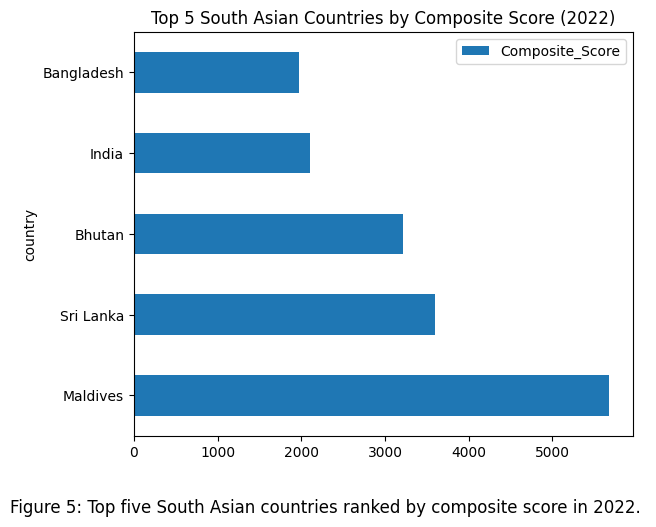

In [128]:
hdi_2022 = southasia_df[southasia_df["year"] == 2022]
top5_2022 = hdi_2022.sort_values(by="Composite_Score", ascending=False).head(5)

plt.figure(figsize=(7,5))
top5_2022.plot(
    kind="barh",
    x="country",
    y="Composite_Score",
    title="Top 5 South Asian Countries by Composite Score (2022)"
)


plt.figtext(
    0.5, -0.08,
    "Figure 5: Top five South Asian countries ranked by composite score in 2022. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()


Interpretation of Figure 5
- The chart identifies the Maldives as the top performing country in South Asia for 2022, achieving a Composite Score significantly higher than the runner up, Sri Lanka. This ranking highlights a regional trend where smaller nations like the Maldives and Bhutan currently outperform larger economies like India and Bangladesh on this specific combined measure of life expectancy and income.

Insight for Figure 5:
- Figure 5 shows that the Maldives leads South Asia in Composite Score for 2022, outperforming larger economies such as India and Bangladesh. This indicates that higher human development in the region is not solely driven by economic size, but by more effective outcomes in health and income indicators.


- [x] Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

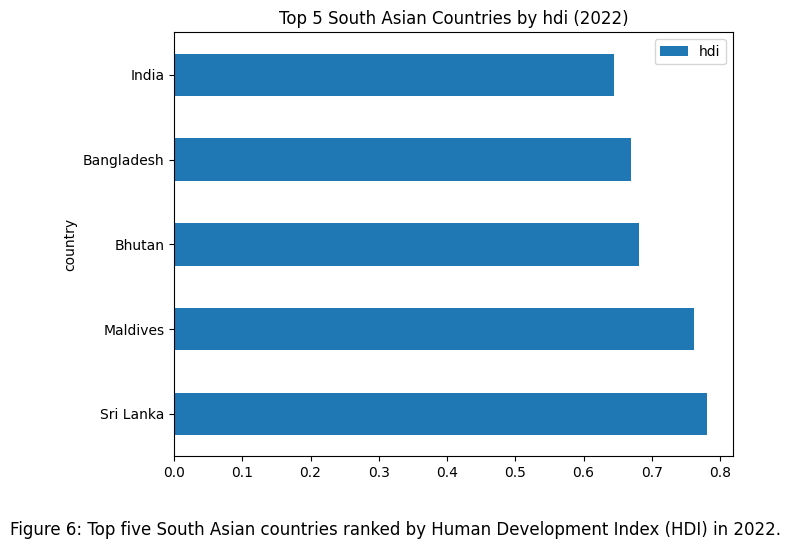

In [129]:
hdi_2022 = southasia_df[southasia_df["year"] == 2022]

top5_2022 = hdi_2022.sort_values(by="hdi", ascending=False).head(5)

top5_2022.plot(
    kind="barh",
    x="country",
    y="hdi",
    title="Top 5 South Asian Countries by hdi (2022)",
    figsize=(7,5),
)
plt.figtext(
    0.5, -0.08,
    "Figure 6: Top five South Asian countries ranked by Human Development Index (HDI) in 2022. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()


While Composite Score highlights overall national strength and capacity, HDI better captures quality of life. Smaller nations like Maldives and Sri Lanka excel in both, whereas larger South Asian countries still face challenges translating economic scale into human development.

Interpretation of Figure of comparison of HDI and composite score
- While Composite Score highlights overall national strength and capacity, HDI better captures quality of life. Smaller nations like Maldives and Sri Lanka excel in both, whereas larger South Asian countries still face challenges translating economic scale into human development.

Insight of Figure of comparison of HDI and composite score
- The comparison of HDI and Composite Score shows that while HDI measures quality of life, the Composite Score reflects overall national capacity. Smaller nations like Maldives and Sri Lanka perform well on both, whereas larger countries struggle to translate economic strength into human development, highlighting the need for balanced policies.


### 3. Outlier Detection:

- [x] Detect outliers in HDI and GNI per Capita using the 1.5 x IQR rule.

In [130]:
def outliers(series):
    """
      parameters: series data
      returns: True if outlier else False
    """
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    return (series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)

In [131]:
southasia_df["hdi outlier"] = outliers(southasia_df["hdi"])
southasia_df["gross_inc_percap outlier"] = outliers(southasia_df["gross_inc_percap"])

- [x] Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color

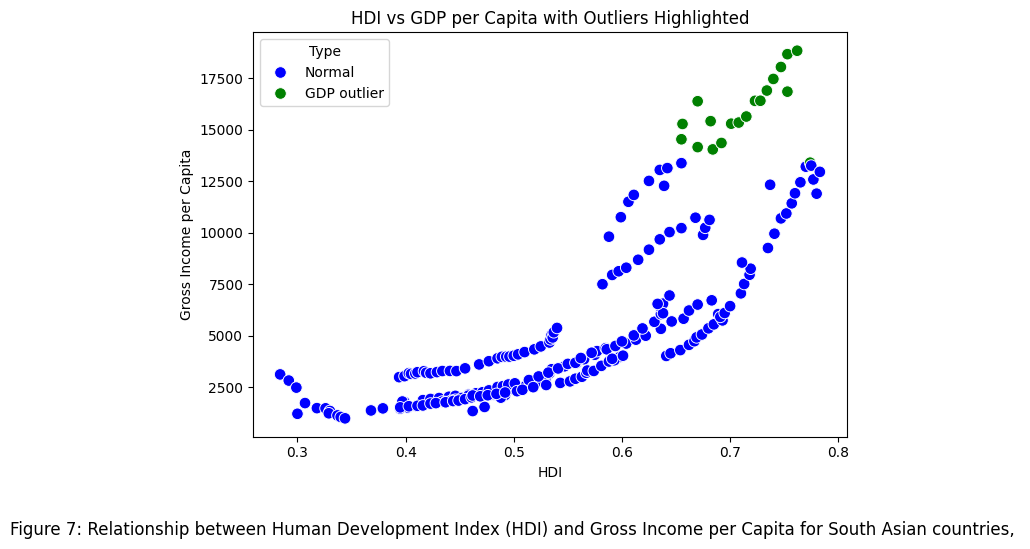

In [132]:
southasia_df["outlier_type"] = "Normal"

southasia_gni_outlier = southasia_df["gross_inc_percap outlier"]
southasia_hdi_outlier = southasia_df["hdi outlier"]

southasia_df.loc[southasia_gni_outlier, "outlier_type"] = "GDP outlier"
southasia_df.loc[southasia_hdi_outlier, "outlier_type"] = "HDI outlier"

palette = {
    "Normal": "blue",
    "GDP outlier": "green",
    "HDI outlier": "orange"
}

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=southasia_df,
    x="hdi",
    y="gross_inc_percap",
    hue="outlier_type",
    palette=palette,
    s=70
)

plt.title("HDI vs GDP per Capita with Outliers Highlighted")
plt.xlabel("HDI")
plt.ylabel("Gross Income per Capita")
plt.legend(title="Type")
plt.figtext(
    0.5, -0.08,
    "Figure 7: Relationship between Human Development Index (HDI) and Gross Income per Capita for South Asian countries, ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()

Interpretation of Figure 7
- The plot illustrates a positive, nonlinear correlation where Gross Income per Capita rises exponentially as HDI improves, indicating that economic growth accelerates significantly at higher development levels. The green outliers show  a distinct economic trajectory that deviates from the standard South Asian pattern.

Insight of Figure 7
- The plot shows a positive, nonlinear relationship between HDI and Gross Income per Capita, with income rising exponentially as human development improves. Green outliers highlight countries that follow a distinct economic path, deviating from the typical South Asian trend.


### 4. Exploring Metric Relationships:

- Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).

- Compute Pearson correlation of each metric with HDI


In [133]:
corr_genderdevelopment_hdi= southasia_df["gender_development"].corr(southasia_df["hdi"], method="pearson")
corr_lifeexpectancy_hdi= southasia_df["life_expectancy"].corr(southasia_df["hdi"], method="pearson")

- [x] Create scatter plots with trendlines to visualize the relationships.

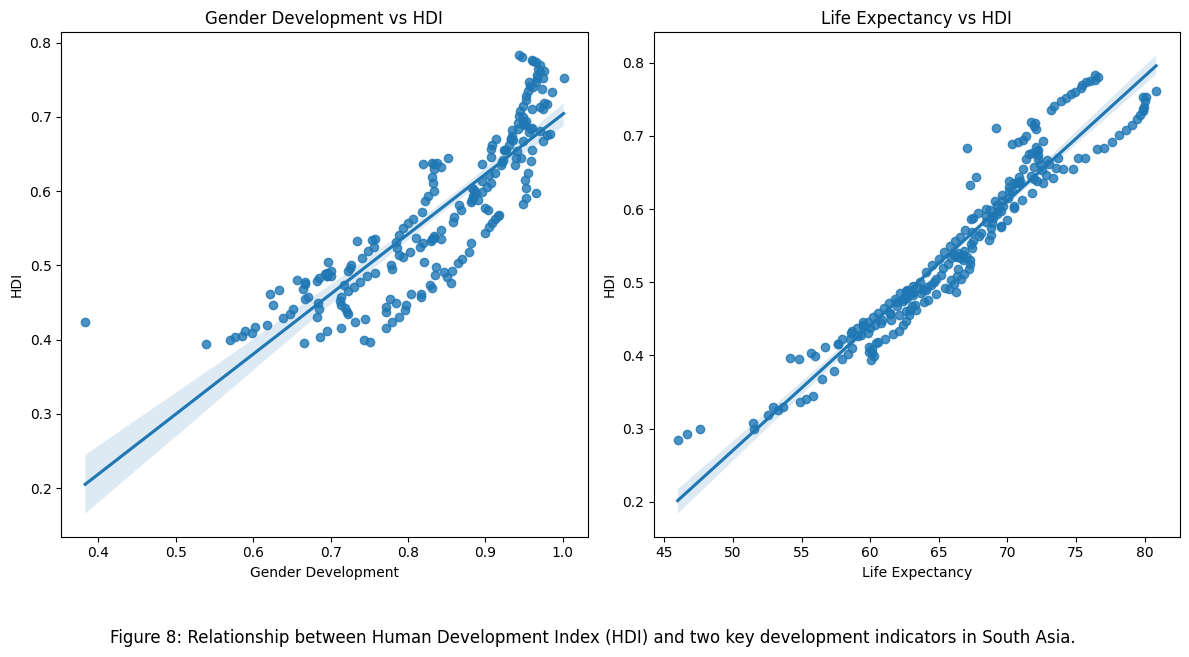

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.regplot(
    data=southasia_df,
    x="gender_development",
    y="hdi",
    ax=axes[0]
)
axes[0].set_title("Gender Development vs HDI")
axes[0].set_xlabel("Gender Development")
axes[0].set_ylabel("HDI")

sns.regplot(
    data=southasia_df,
    x="life_expectancy",
    y="hdi",
    ax=axes[1]
)
axes[1].set_title("Life Expectancy vs HDI")
axes[1].set_xlabel("Life Expectancy")
axes[1].set_ylabel("HDI")

fig.text(
    0.5, -0.08,
    "Figure 8: Relationship between Human Development Index (HDI) and two key development indicators in South Asia. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()


Interpretation of Figure 8
- The visual comparison reveals that Life Expectancy is a significantly stronger and more consistent predictor of HDI in South Asia than Gender Development, as evidenced by the extremely tight linear clustering of data points . While Gender Development also shows a positive correlation, the noticeably wider dispersion of points indicates a weaker relationship with more variability .

Insight of Figure 8
- Figure 8 shows that Life Expectancy is a strong and consistent predictor of HDI in South Asia, evidenced by the tight linear clustering of data points. In contrast, Gender Development, though positively correlated, has a weaker and more variable relationship with HDI.


- [x] Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

In [135]:
print(f"Correlation between Gender Development and HDI: {corr_genderdevelopment_hdi}")
print(f"Correlation between Life Expectancy and HDI: {corr_lifeexpectancy_hdi}")

Correlation between Gender Development and HDI: 0.865621005012754
Correlation between Life Expectancy and HDI: 0.9587610559043978


The analysis of correlations shows that Life Expectancy has the strongest relationship with the Human Development Index (HDI), with a correlation coefficient of approximately 0.959. This indicates that countries with higher life expectancy tend to have higher HDI scores. In contrast, Gender Development exhibits the weakest relationship with HDI, with a correlation of around 0.866, suggesting that although it is positively associated with HDI, the strength of this relationship is lower compared to life expectancy

### 5. Gap Analysis:

- [x] Create a new metric: GNI HDI Gap = "gross inc percap" - "hdi"

In [136]:
GNI_HDI_Gap = southasia_df["gross_inc_percap"] - southasia_df["hdi"]
southasia_df["GNI_HDI_Gap"] = GNI_HDI_Gap

In [137]:
southasia_df[["country","gross_inc_percap","hdi","GNI_HDI_Gap"]]

,country,gross_inc_percap,hdi,GNI_HDI_Gap
0,Afghanistan,3115.670448,0.284,3115.386448
1,Afghanistan,2817.304736,0.292,2817.012736
2,Afghanistan,2474.681985,0.299,2474.382985
3,Afghanistan,1723.019763,0.307,1722.712763
4,Afghanistan,1202.010488,0.300,1201.710488
...,...,...,...,...
5473,Sri Lanka,13405.803690,0.774,13405.029690
5474,Sri Lanka,13262.958220,0.775,13262.183220
5475,Sri Lanka,12589.806450,0.777,12589.029450
5476,Sri Lanka,12958.822260,0.783,12958.039260


- [x] Rank South Asian countries by GNI HDI Gap in descending and ascending order.

In [138]:
gaps = southasia_df.sort_values(by="GNI_HDI_Gap", ascending=False).drop_duplicates(subset="country")
rank_asc = gaps.sort_values(by="GNI_HDI_Gap", ascending=True)
rank_desc = gaps.sort_values(by="GNI_HDI_Gap", ascending=False)

- [x] Plot the top 3 positive gaps and top 3 negative gaps.

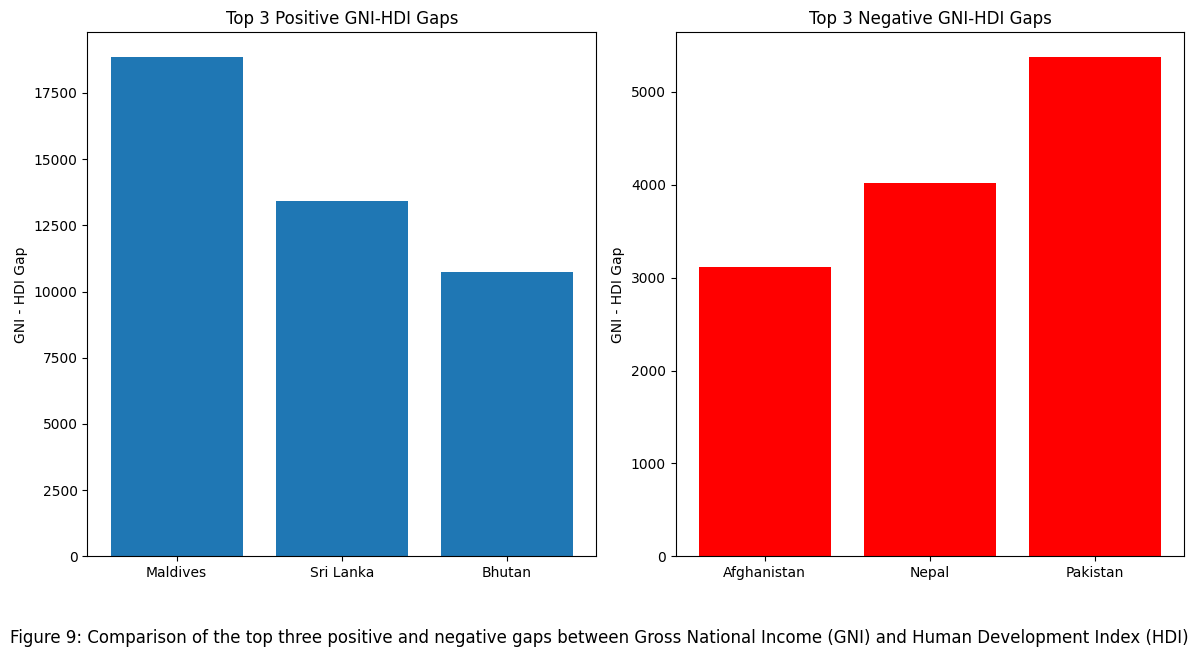

In [139]:
top_pos = rank_desc.head(3)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].bar(top_pos['country'], top_pos['GNI_HDI_Gap'])
axes[0].set_title('Top 3 Positive GNI-HDI Gaps')
axes[0].set_ylabel('GNI - HDI Gap')

top_neg = rank_asc.head(3)

axes[1].bar(top_neg['country'], top_neg['GNI_HDI_Gap'], color='red')
axes[1].set_title('Top 3 Negative GNI-HDI Gaps')
axes[1].set_ylabel('GNI - HDI Gap')
fig.text(
    0.5, -0.08,
    "Figure 9: Comparison of the top three positive and negative gaps between Gross National Income (GNI) and Human Development Index (HDI)",
    ha="center",
    fontsize=12
)

plt.tight_layout()

- [x] Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

> A noticeable gap between high GNI per capita and lower-than-expected HDI suggests that economic wealth alone does not guarantee human development. In several cases, countries with high income levels do not achieve equally high HDI scores because HDI also depends on health outcomes, education quality, and income distribution.
This gap highlights the importance of inclusive development policies that prioritize health, education, and social equity rather than focusing solely on economic growth.

Interpretation of Figure 9
- The charts highlight an economic disparity within South Asia, identifying the Maldives, Sri Lanka, and Bhutan as having the largest positive gaps driven by their substantially higher national incomes relative to their HDI scores. In contrast, the negative gaps for Afghanistan, Nepal, and Pakistan underscore these nations as the most economically constrained, indicating that low income levels are the primary limiting factor in their overall human development.

Insight of Figure 9
- Figure 9 highlights economic disparities within South Asia, showing that Maldives, Sri Lanka, and Bhutan have the largest positive gaps due to higher national incomes relative to their HDI. Conversely, Afghanistan, Nepal, and Pakistan exhibit negative gaps, indicating that low income is a key constraint on their human development.


# Problem 3

Comparative Regional Analysis: South Asia vs Middle East

## 1. Create Middle East Subset:

- [x] Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].

In [140]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Isreal", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [141]:
df_middle_east_filtered = df_filtered[(df_filtered["country"].isin(middle_east_countries))].copy()
df_southasia_filtered = df_filtered[(df_filtered["country"].isin(southasia_countries))].copy()

- [x] Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [142]:
df_middle_east_filtered.to_csv("HDI_MiddleEast_2020_2022.csv")
df_southasia_filtered.to_csv("HDI_SouthAsia_2020_2022.csv")

## 2. Descriptive Statistics:

- [x] Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020 - 2022.

In [143]:
mean_middle_east = df_middle_east_filtered["hdi"].mean()
std_middle_east = df_middle_east_filtered["hdi"].std()

mean_south_asia = df_southasia_filtered["hdi"].mean()
std_south_asia = df_southasia_filtered["hdi"].std()

print(f"Mean HDI for Middle East: {mean_middle_east}")
print(f"Standard Deviation of HDI for Middle East: {std_middle_east}")

print()

print(f"Mean HDI for South Asia: {mean_south_asia}")
print(f"Standard Deviation of HDI for South Asia: {std_south_asia}")

Mean HDI for Middle East: 0.7767333333333334
Standard Deviation of HDI for Middle East: 0.1426222242519542

Mean HDI for South Asia: 0.6395833333333333
Standard Deviation of HDI for South Asia: 0.09827331747496995


- [x] Identify which region performs better on average.

## 3. Top and Bottom Performers:

- [x] Identify the top 3 and bottom 3 countries in each region based on HDI.

In [144]:
sa_avg_hdi = df_southasia_filtered.groupby("country")["hdi"].mean().sort_values()
me_avg_hdi = df_middle_east_filtered.groupby("country")["hdi"].mean().sort_values()

sa_bottom3 = sa_avg_hdi.head(3)
sa_top3 = sa_avg_hdi.tail(3)

me_bottom3 = me_avg_hdi.head(3)
me_top3 = me_avg_hdi.tail(3)

print("\nSouth Asia Top 3:\n", sa_top3)
print("\nSouth Asia Bottom 3:\n", sa_bottom3)

print("\nMiddle East Top 3:\n", me_top3)
print("\nMiddle East Bottom 3:\n", me_bottom3)



South Asia Top 3:
 country
Bhutan       0.677667
Maldives     0.750667
Sri Lanka    0.780000
Name: hdi, dtype: float64

South Asia Bottom 3:
 country
Afghanistan    0.474333
Pakistan       0.537667
Nepal          0.595000
Name: hdi, dtype: float64

Middle East Top 3:
 country
Saudi Arabia            0.867667
Bahrain                 0.885333
United Arab Emirates    0.932667
Name: hdi, dtype: float64

Middle East Bottom 3:
 country
Yemen      0.426333
Iraq       0.667000
Lebanon    0.730000
Name: hdi, dtype: float64


- [x] Create a bar chart comparing these top and bottom performers across the two regions

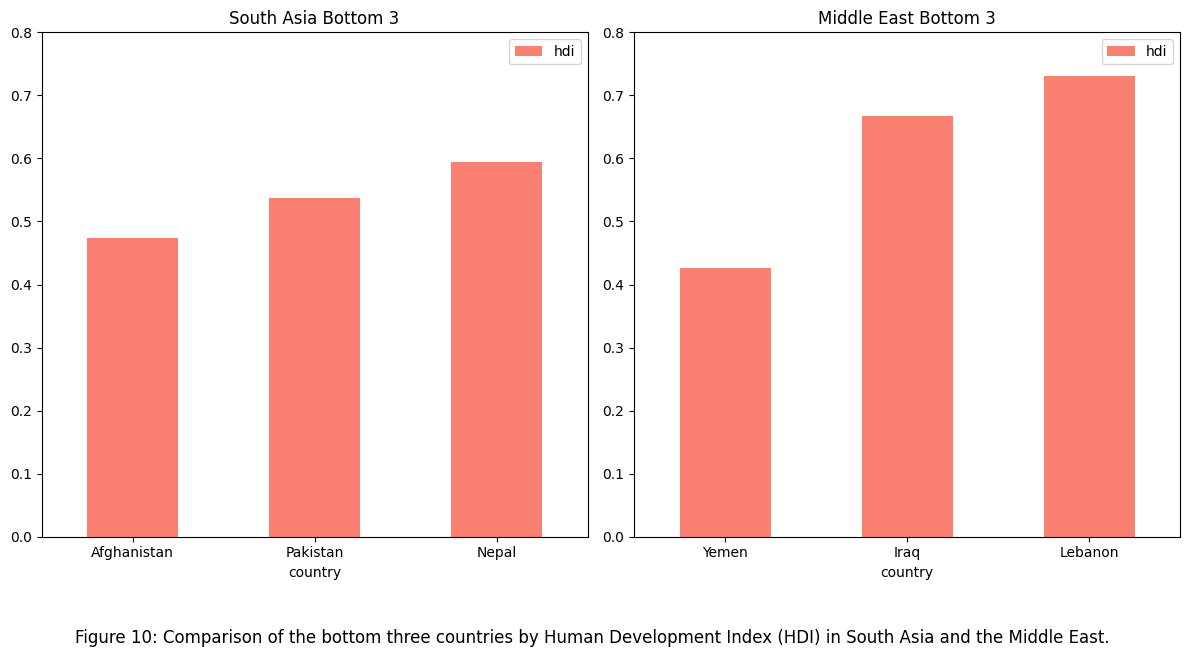

In [145]:
fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize=(12, 6))

sa_bottom3.plot(kind="bar", x="country", y="hdi", ax=axes[0], rot=0, title = "South Asia Bottom 3", color="salmon", legend=True)
axes[0].set_ylim(0, 0.8)
me_bottom3.plot(kind="bar", x="country", y="hdi", ax=axes[1], rot=0, title = "Middle East Bottom 3", color="salmon", legend=True)
axes[1].set_ylim(0, 0.8)
fig.text(
    0.5, -0.08,
    "Figure 10: Comparison of the bottom three countries by Human Development Index (HDI) in South Asia and the Middle East. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()

Interpretation of Figure 10
- The figure highlights a distinct regional disparity where the Middle East's nations significantly outperform South Asia's bottom countries, indicating a much higher development baseline in the Middle East. However, the similarly critical scores of Afghanistan and Yemen suggest that severe instability creates comparable depths of human development crises regardless of the region's broader economic strength.

Insight of Figure 10
- Figure 10 highlights regional disparities, showing that Middle Eastern countries generally outperform South Asia's lower-ranked nations, reflecting a higher development baseline. However, the low scores of Afghanistan and Yemen indicate that severe instability can create equally deep human development crises, regardless of regional economic strength.


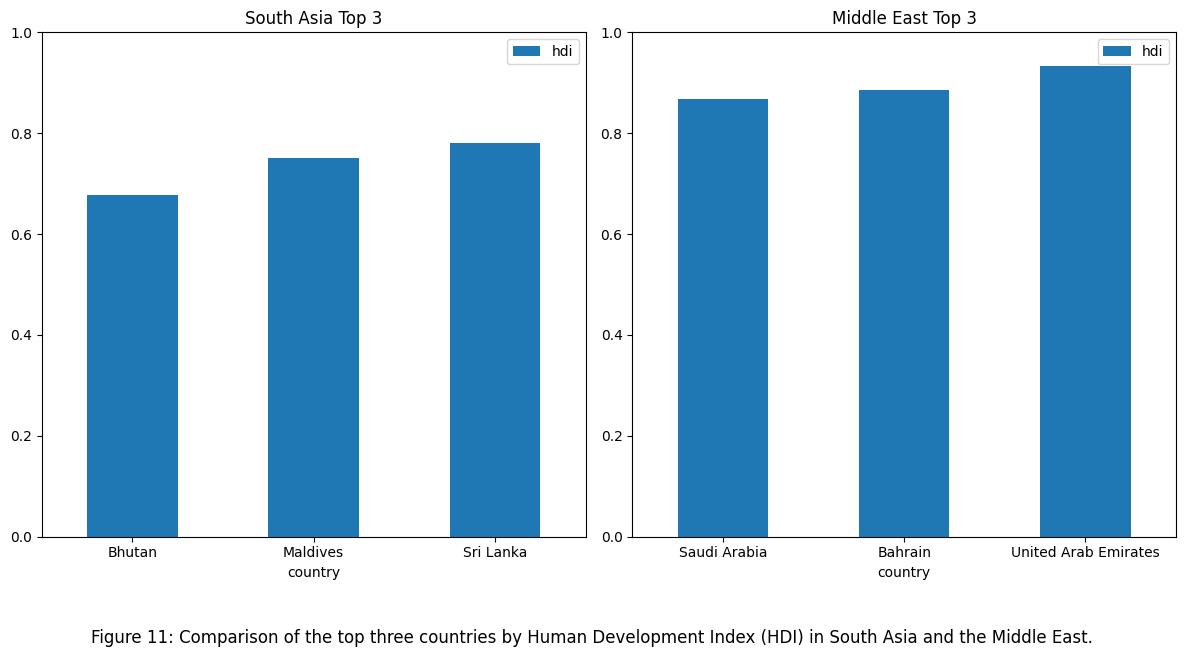

In [146]:
fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize=(12, 6))

sa_top3.plot(kind="bar", x="country", y="hdi", ax=axes[0], rot=0, title = "South Asia Top 3", legend=True)
axes[0].set_ylim(0, 1)
me_top3.plot(kind="bar", x="country", y="hdi", ax=axes[1], rot=0, title = "Middle East Top 3", legend=True)
axes[1].set_ylim(0, 1)
fig.text(
    0.5, -0.08,
    "Figure 11: Comparison of the top three countries by Human Development Index (HDI) in South Asia and the Middle East. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()

Interpretation of Figure 11
- The comparison reveals a significant regional disparity, as the top performing Middle Eastern nations all achieve very high HDI scores that substantially exceed South Asia's leaders . This contrast highlights that the development ceiling in the Middle East is currently much higher

Insight of Figure 11
- Figure 11 shows a clear regional disparity, with top Middle Eastern nations achieving much higher HDI scores than South Asia’s leaders. This indicates that the development ceiling in the Middle East is currently far higher, highlighting the gap that South Asian countries need to address.


## 4. Metric Comparisons:

Compare the following metrics across regions using grouped bar charts:
- Compare the following metrics across regions using grouped bar charts:
- Gender Development Index {"gender development"}
- Life Expectancy Index {"life expectancy"}
- GNI per Capita Index {"gross inc percap"}
Identify which metric shows the greatest disparity between regionsCompare the following metrics across regions using grouped bar charts:

In [147]:
gender_development_sa = df_southasia_filtered["gender_development"].mean()
life_expectancy_sa = df_southasia_filtered["life_expectancy"].mean()
gross_inc_percap_sa = df_southasia_filtered["gross_inc_percap"].mean()


gender_development_me = df_middle_east_filtered["gender_development"].mean()
life_expectancy_me = df_middle_east_filtered["life_expectancy"].mean()
gross_inc_percap_me = df_middle_east_filtered["gross_inc_percap"].mean()

print(f"GENDER DEVELOPMENT SOUTH ASIA   {gender_development_sa}")
print(f"GENDER DEVELOPMENT MIDDLE EAST  {gender_development_me}")
print()
print(f"LIFE EXPECTANCY SOUTH ASIA      {life_expectancy_sa}")
print(f"LIFE EXPECTANCY MIDDLE EAST     {life_expectancy_me}")
print()
print(f"GROSS INC PER CAPITA            {gross_inc_percap_sa}")
print(f"GROSS INC PER CAPITA            {gross_inc_percap_me}")

GENDER DEVELOPMENT SOUTH ASIA   0.8814583333333333
GENDER DEVELOPMENT MIDDLE EAST  0.8873666666666669

LIFE EXPECTANCY SOUTH ASIA      70.97008333333333
LIFE EXPECTANCY MIDDLE EAST     75.20046666666667

GROSS INC PER CAPITA            7766.509931458332
GROSS INC PER CAPITA            37370.29158326667


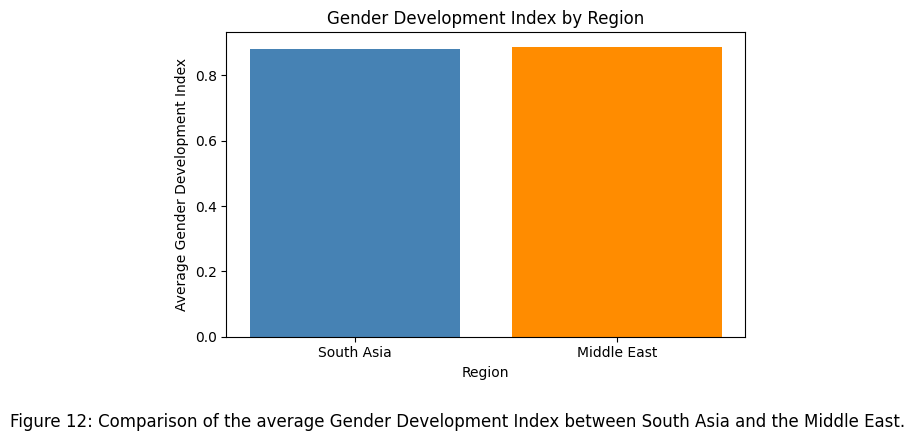

In [148]:
regions = ["South Asia", "Middle East"]
gender_values = [gender_development_sa, gender_development_me]

plt.figure(figsize=(6,4))
plt.bar(regions, gender_values, color=["steelblue", "darkorange"])

plt.title("Gender Development Index by Region")
plt.ylabel("Average Gender Development Index")
plt.xlabel("Region")
plt.figtext(
    0.5, -0.08,
    "Figure 12: Comparison of the average Gender Development Index between South Asia and the Middle East. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.tight_layout()
plt.show()


Interpretation of Figure 12
- The chart illustrates that the average Gender Development Index in South Asia is nearly identical to that of the Middle East. This suggests that despite the Middle East's substantial economic advantage, both regions face comparable challenges regarding gender based development disparities, with neither holding a significant lead in gender equity.

Insight of Figure 12
- Figure 12 shows that the average Gender Development Index in South Asia is nearly equal to that of the Middle East. This indicates that despite the Middle East’s greater economic resources, both regions face similar challenges in achieving gender equity.


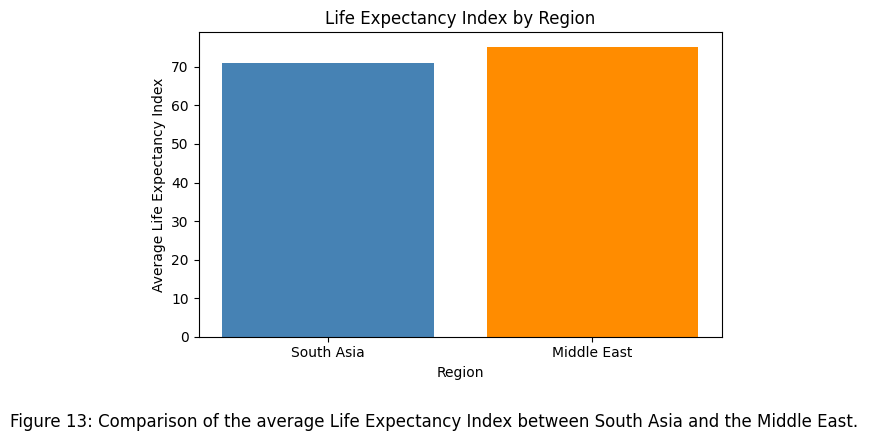

In [149]:
life_values = [life_expectancy_sa, life_expectancy_me]

plt.figure(figsize=(6,4))
plt.bar(regions, life_values, color=["steelblue", "darkorange"])

plt.title("Life Expectancy Index by Region")
plt.ylabel("Average Life Expectancy Index")
plt.xlabel("Region")
plt.figtext(
    0.5, -0.08,
    "Figure 13: Comparison of the average Life Expectancy Index between South Asia and the Middle East. ",
    ha="center",
    fontsize=12
)
plt.tight_layout()
plt.show()


Interpretation of Figure 13
- The chart demonstrates that the Middle East maintains a higher average life expectancy than South Asia, reflecting better overall health infrastructure and living standards in the region. However, the relatively narrow gap between the two bars indicates that South Asia performs surprisingly well in public health outcomes, trailing the wealthier Middle East by a much smaller margin than seen in economic metrics like GNI.

Insight of Figure 13
- Figure 13 shows that the Middle East has a higher average life expectancy than South Asia, reflecting stronger health infrastructure and living standards. However, the relatively small gap indicates that South Asia performs well in public health, trailing the Middle East by a much smaller margin than in economic indicators like GNI.


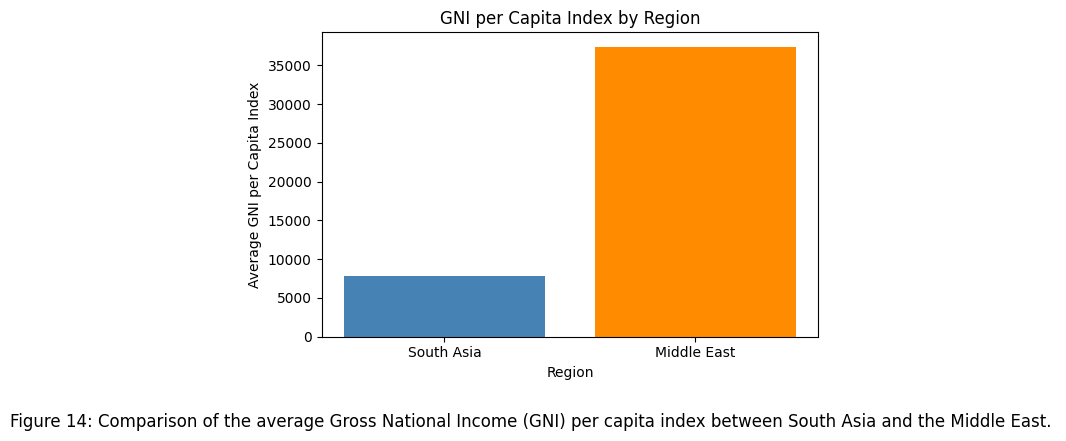

In [150]:
gni_values = [gross_inc_percap_sa, gross_inc_percap_me]

plt.figure(figsize=(6,4))
plt.bar(regions, gni_values, color=["steelblue", "darkorange"])

plt.title("GNI per Capita Index by Region")
plt.ylabel("Average GNI per Capita Index")
plt.xlabel("Region")
plt.figtext(
    0.5, -0.08,
    "Figure 14: Comparison of the average Gross National Income (GNI) per capita index between South Asia and the Middle East. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()


Interpretation of Figure 14
- The chart reveals a massive economic divide, with the Middle East having an average GNI per capita higher than South Asia. This overwhelming disparity identifies national income as the primary driver of inequality between the two regions, significantly outweighing the smaller gaps seen in health and gender metrics.

Insight of Figure 14
- Figure 14 highlights a significant economic divide, with the Middle East having a much higher average GNI per capita than South Asia. This indicates that national income is the main driver of regional inequality, far exceeding the smaller differences observed in health and gender metrics.


## 5. HDI Disparity:

- [x] Compute the range (max - min) of HDI for each region.

In [151]:
max_hdi_sa = df_southasia_filtered["hdi"].max()
min_hdi_sa = df_southasia_filtered["hdi"].min()

max_hdi_me = df_middle_east_filtered["hdi"].max()
min_hdi_me = df_middle_east_filtered["hdi"].min()

range_sa = max_hdi_sa - min_hdi_sa
range_me = max_hdi_me - min_hdi_me

print(f"Range of HDI for South Asia: {range_sa}")
print(f"Range of HDI for Middle East: {range_me}")

Range of HDI for South Asia: 0.321
Range of HDI for Middle East: 0.5130000000000001


- [x] Compute the coefficient of variation (CV = std/mean) for HDI.

In [152]:
std_sa = df_southasia_filtered["hdi"].std()
mean_sa = df_southasia_filtered["hdi"].mean()

std_me = df_middle_east_filtered["hdi"].std()
mean_me = df_middle_east_filtered["hdi"].mean()

cv_sa = std_sa / mean_sa
cv_me = std_me / mean_me


print(f"Coefficient of Variation (CV) for South Asia: {cv_sa}")
print(f"Coefficient of Variation (CV) for Middle East: {cv_me}")

Coefficient of Variation (CV) for South Asia: 0.1536520924690084
Coefficient of Variation (CV) for Middle East: 0.18361800392921748


- [x] Identify which region exhibits more variation in HDI.
> From Above data we can see, South Asia is exhibiting more variation in Human Development Index (HDI)

## Correlation Analysis

For each region, compute correlations of HDI with:
- Gender Development Index
- Life Expectancy Index

In [153]:
# SOUTH ASIA
corr_hdi_gender_sa = df_southasia_filtered["hdi"].corr(df_southasia_filtered["gender_development"], method="pearson")
corr_hdi_life_sa = df_southasia_filtered["hdi"].corr(df_southasia_filtered["life_expectancy"], method="pearson")

# MIDDLE EAST
corr_hdi_gender_me = df_middle_east_filtered["hdi"].corr(df_middle_east_filtered["gender_development"], method="pearson")
corr_hdi_life_me = df_middle_east_filtered["hdi"].corr(df_middle_east_filtered["life_expectancy"], method="pearson")

In [154]:
print(f"CORR HDI GENDER SOUTH ASIA {corr_hdi_gender_sa}")
print(f"CORR HDI GENDER MIDDLE EAST {corr_hdi_gender_me}")
print()
print(f"CORR HDI LIFE EXPECTANCY SOUTH ASIA {corr_hdi_life_sa}")
print(f"CORR HDI LIFE EXPECTANCY MIDDLE EAST {corr_hdi_life_me}")

CORR HDI GENDER SOUTH ASIA 0.8742177004831327
CORR HDI GENDER MIDDLE EAST 0.9360954290299537

CORR HDI LIFE EXPECTANCY SOUTH ASIA 0.9387641385416623
CORR HDI LIFE EXPECTANCY MIDDLE EAST 0.9360212027493279


- [x] Create scatter plots with trendlines for each correlation.

South Asia

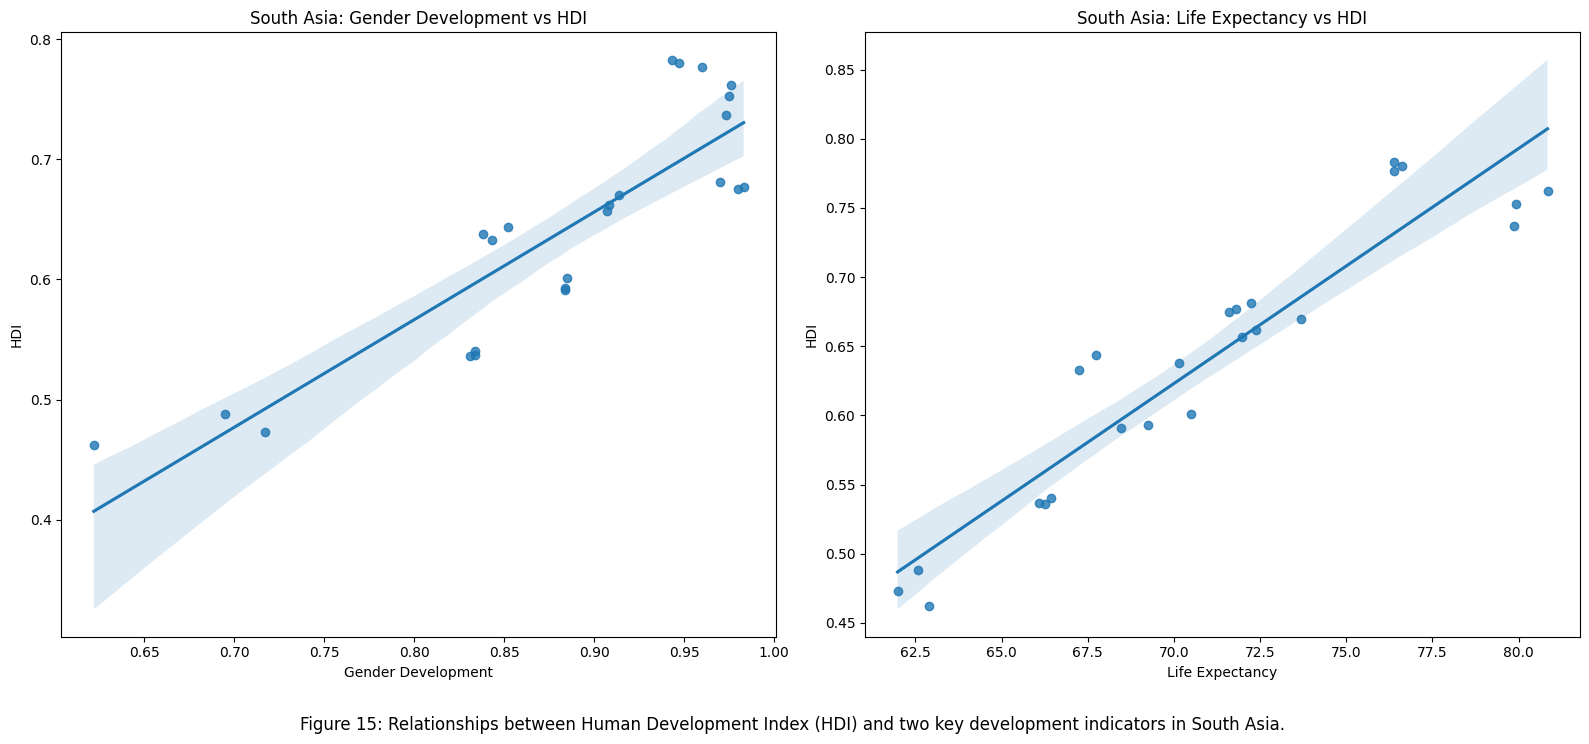

In [155]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize= (16,7))

sns.regplot(data = df_southasia_filtered, x="gender_development", y="hdi", ax=axes[0])
axes[0].set_title("South Asia: Gender Development vs HDI")
axes[0].set_xlabel("Gender Development")
axes[0].set_ylabel("HDI")

sns.regplot(data = df_southasia_filtered, x="life_expectancy", y="hdi", ax=axes[1])
axes[1].set_title("South Asia: Life Expectancy vs HDI")
axes[1].set_xlabel("Life Expectancy")
axes[1].set_ylabel("HDI")
fig.text(
    0.5, -0.05,
    "Figure 15: Relationships between Human Development Index (HDI) and two key development indicators in South Asia. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()

Middle East

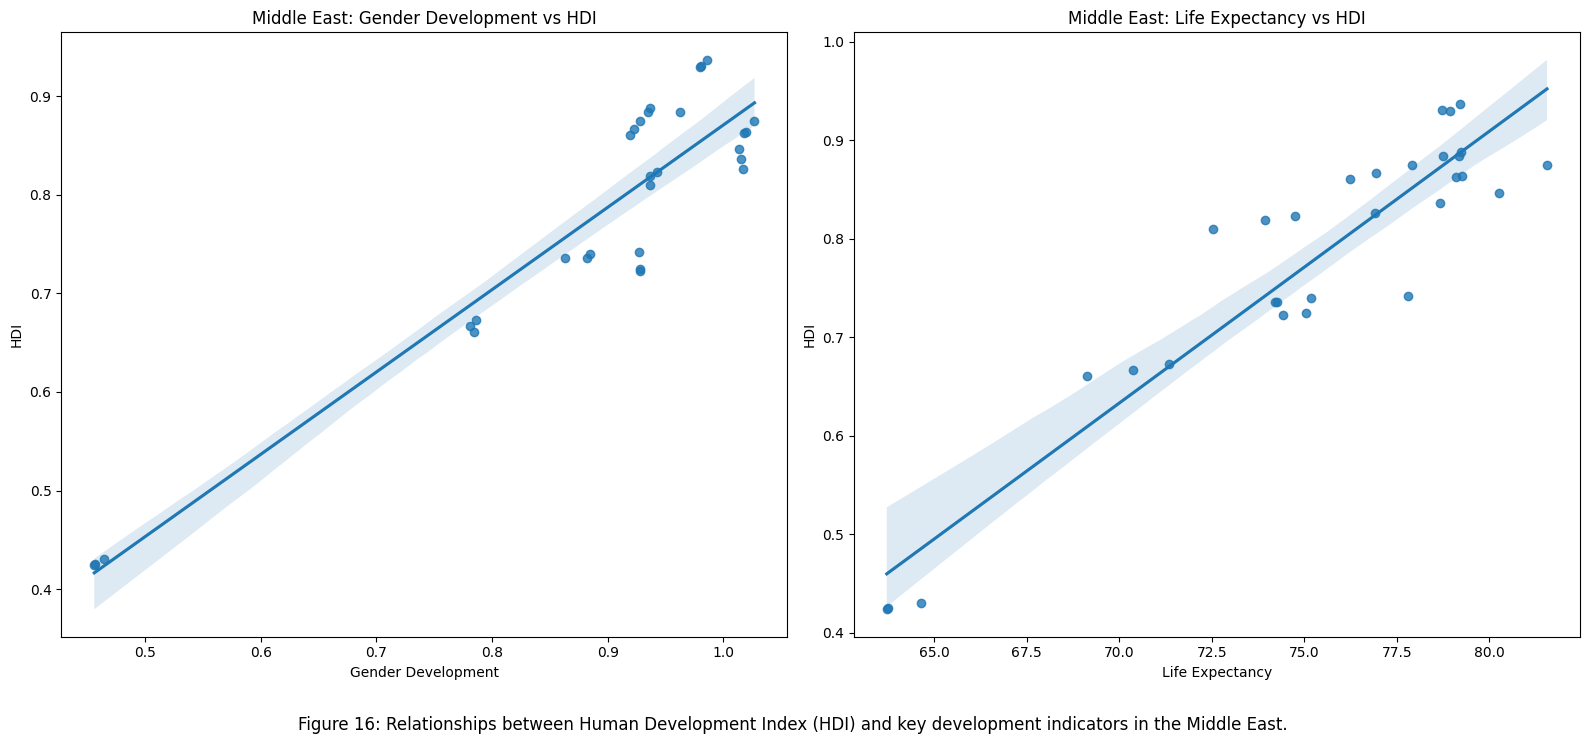

In [156]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize= (16,7))

sns.regplot(
    data=df_middle_east_filtered,
    x="gender_development",
    y="hdi",
    ax=axes[0]
)
axes[0].set_title("Middle East: Gender Development vs HDI")
axes[0].set_xlabel("Gender Development")
axes[0].set_ylabel("HDI")
sns.regplot(
    data=df_middle_east_filtered,
    x="life_expectancy",
    y="hdi",
    ax=axes[1]
)
axes[1].set_title("Middle East: Life Expectancy vs HDI")
axes[1].set_xlabel("Life Expectancy")
axes[1].set_ylabel("HDI")
fig.text(
    0.5, -0.05,
    "Figure 16: Relationships between Human Development Index (HDI) and key development indicators in the Middle East. ",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()

Interpretation of Figure 15 and 16
- We can see from the above graph and data that the Middle East is largely related to HDI and gender development with correlation of 0.9360954290299537 and is also largely related to HDI and life expectancy 0.9360212027493279.
But in the case of South Asia, South Asia is comparatively more correlated to HDI and Life expectancy with correlation of 0.9387641385416623 compared to that of 0.8742177004831327 with HDI and gender development.

Insight of Figure 15 and 16
- Figures 15 and 16 show that in the Middle East, HDI is strongly correlated with both Gender Development (0.936) and Life Expectancy (0.936), indicating balanced contributions from health and gender factors. In South Asia, HDI is more closely linked to Life Expectancy (0.939) than to Gender Development (0.874), suggesting that health outcomes play a stronger role in shaping human development in the region.


## Outlier Detection

- [x] Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 x IQR rule.

In [157]:
def outliers(series):
    """
      parameters: series data
      returns: True if outlier else False
    """
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    return (series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)

In [158]:
df_southasia_filtered["HDI Outlier"] = outliers(df_southasia_filtered["hdi"])
df_southasia_filtered["GNI Outlier"] = outliers(df_southasia_filtered["gross_inc_percap"])


df_middle_east_filtered["HDI Outlier"] = outliers(df_middle_east_filtered["hdi"])
df_middle_east_filtered["GNI Outlier"] = outliers(df_middle_east_filtered["gross_inc_percap"])

In [159]:
print("COUNTRIES THAT ARE OUTLIDERS")
print(df_southasia_filtered[df_southasia_filtered["HDI Outlier"] == True]["country"])
print(df_southasia_filtered[df_southasia_filtered["GNI Outlier"] == True]["country"])
print()
print(df_middle_east_filtered[df_middle_east_filtered["HDI Outlier"] == True]["country"])
print(df_middle_east_filtered[df_middle_east_filtered["GNI Outlier"] == True]["country"])

COUNTRIES THAT ARE OUTLIDERS
Series([], Name: country, dtype: object)
Series([], Name: country, dtype: object)

6366    Yemen
6367    Yemen
6368    Yemen
Name: country, dtype: object
Series([], Name: country, dtype: object)


- [x] Create scatter plots highlighting outliers in a different color.

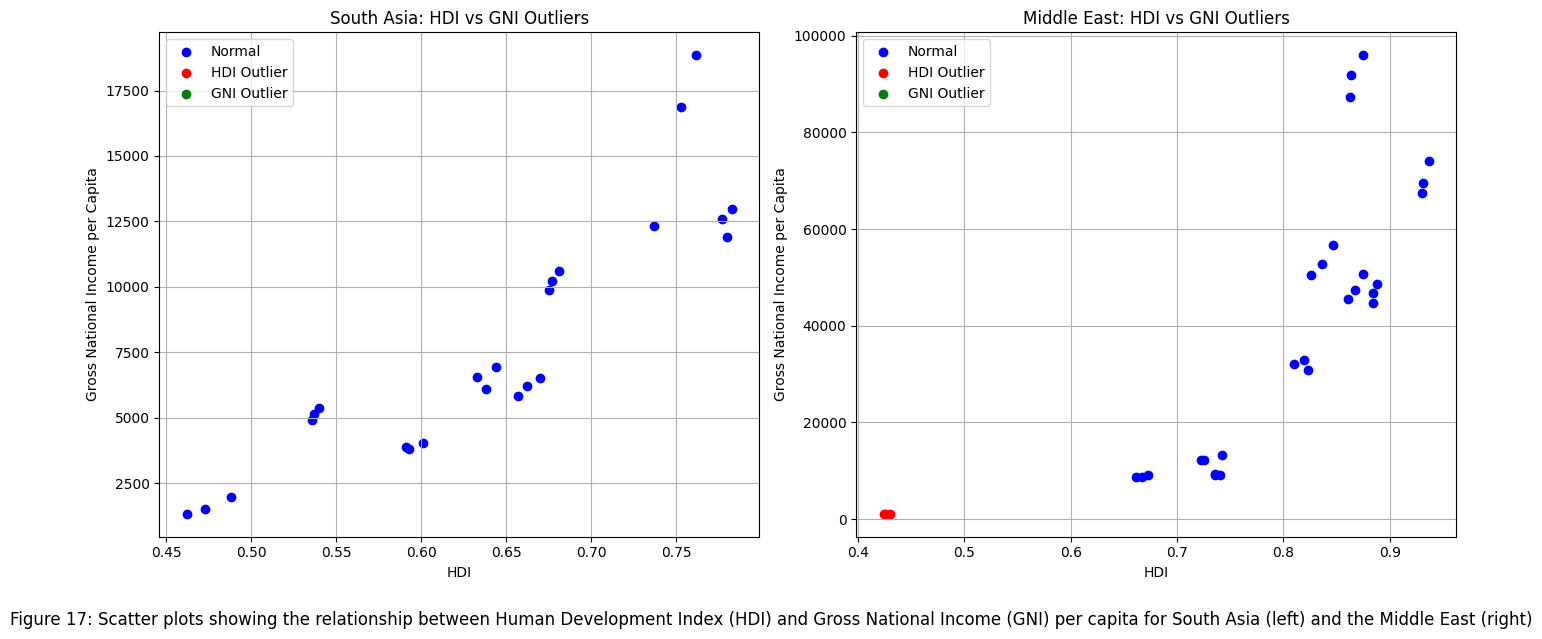

In [160]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# SOUTH ASIA
# NORMAL DATA PLOT ( BOTH OUTLIERS ARE FALSE)
normal_sa = (df_southasia_filtered["HDI Outlier"] == False) & (df_southasia_filtered["GNI Outlier"] == False)
ax[0].scatter(df_southasia_filtered.loc[normal_sa, "hdi"], df_southasia_filtered.loc[normal_sa, "gross_inc_percap"],color="blue", label="Normal")
# HDI OUTLIER
mask_hdi_sa = df_southasia_filtered["HDI Outlier"] == True
ax[0].scatter(df_southasia_filtered.loc[mask_hdi_sa, "hdi"], df_southasia_filtered.loc[mask_hdi_sa, "gross_inc_percap"],color="red", label="HDI Outlier")
# GNI OUTLIER
mask_gni_sa = df_southasia_filtered["GNI Outlier"] == True
ax[0].scatter(df_southasia_filtered.loc[mask_gni_sa, "hdi"],df_southasia_filtered.loc[mask_gni_sa, "gross_inc_percap"],color="green", label="GNI Outlier")

ax[0].set_xlabel("HDI")
ax[0].set_ylabel("Gross National Income per Capita")
ax[0].set_title("South Asia: HDI vs GNI Outliers")
ax[0].legend()
ax[0].grid(True)

# MIDDLE EAST
# NORMAL DATA PLOT ( BOTH OUTLIERS ARE FALSE)
normal_me = (df_middle_east_filtered["HDI Outlier"] == False) & (df_middle_east_filtered["GNI Outlier"] == False)
ax[1].scatter(df_middle_east_filtered.loc[normal_me, "hdi"],df_middle_east_filtered.loc[normal_me, "gross_inc_percap"],color="blue", label="Normal")
# HDI OUTLIER
mask_hdi_me = df_middle_east_filtered["HDI Outlier"] == True
ax[1].scatter(df_middle_east_filtered.loc[mask_hdi_me, "hdi"],df_middle_east_filtered.loc[mask_hdi_me, "gross_inc_percap"],color="red", label="HDI Outlier")
# GNI OUTLIER
mask_gni_me = df_middle_east_filtered["GNI Outlier"] == True
ax[1].scatter(df_middle_east_filtered.loc[mask_gni_me, "hdi"],df_middle_east_filtered.loc[mask_gni_me, "gross_inc_percap"],color="green", label="GNI Outlier")

ax[1].set_xlabel("HDI")
ax[1].set_ylabel("Gross National Income per Capita")
ax[1].set_title("Middle East: HDI vs GNI Outliers")
ax[1].legend()
ax[1].grid(True)

fig.text(
    0.5, -0.05,
    "Figure 17: Scatter plots showing the relationship between Human Development Index (HDI) and Gross National Income (GNI) per capita for South Asia (left) and the Middle East (right)",
    ha="center",
    fontsize=12
)

plt.tight_layout()
plt.show()

Interpretation of Figure 17
- Outliers are data points that lie far from the main cluster and can significantly affect how a group appears overall. When included without consideration, they may distort comparisons and lead to inaccurate interpretations of a country’s performance. For this reason, outliers are often better analyzed separately. In this case, several Middle Eastern countries exhibit noticeable outliers, whereas the South Asian countries show a more consistent pattern with no significant outliers.

Insight of Figure 17
- Figure 17 shows that several Middle Eastern countries have noticeable outliers, which can distort overall comparisons if not considered separately. In contrast, South Asian countries display a more consistent pattern, with no significant outliers affecting the interpretation of their performance.


- [x] Discuss the significance of these outliers.

The outliers can stand apart from the general data cluster and can influence the distribution and performance of countries. Because of this, outliers can create a misleading impression of the group unless the outliers are handled separately

Here we can see some outliers in Middle Eastern countries compared to no any outliers in south asia